In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.style.use('seaborn-white')

In [2]:
#Interact_dirX = 'Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_SATORI'
Interact_dirX = 'Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI'
#Interact_dirX = 'TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8_from_customTFs/Interactions_SATORI'
#Interact_dirX = 'Simulated_Data_Analysis_Test/Interactions_SATORI'

Interact_dir = '../results/'+Interact_dirX
outprefix = Interact_dirX.split('_')[0]

In [3]:
outprefix+'_norm_attn_dist.pdf'

'Human_norm_attn_dist.pdf'

In [4]:
with open(Interact_dir+'/interaction_keys_dict.pckl','rb') as f:
    Filter_Intr_Keys = pickle.load(f)
with open(Interact_dir+'/background_results_raw.pckl','rb') as f:
    Filter_Intr_Attn_neg,Filter_Intr_Pos_neg, seq_info_dict_list_neg = pickle.load(f)
with open(Interact_dir+'/main_results_raw.pckl','rb') as f:
    Filter_Intr_Attn,Filter_Intr_Pos, seq_info_dict_list = pickle.load(f)

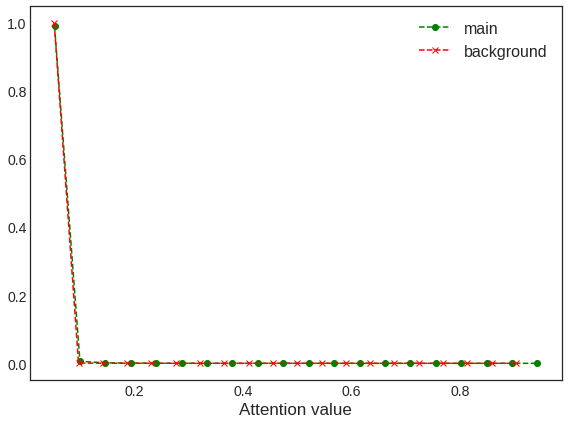

In [5]:
plt.figure(figsize=(8,6))
resMain = Filter_Intr_Attn[Filter_Intr_Attn!=-1]                                                                                                                                               
resBg = Filter_Intr_Attn_neg[Filter_Intr_Attn_neg!=-1]
resMainHist = np.histogram(resMain,bins=20)
resBgHist = np.histogram(resBg,bins=20)
plt.plot(resMainHist[1][1:],resMainHist[0]/sum(resMainHist[0]),linestyle='--',marker='o',color='g',label='main')
plt.plot(resBgHist[1][1:],resBgHist[0]/sum(resBgHist[0]),linestyle='--',marker='x',color='r',label='background')
plt.legend(loc='best',fontsize=16)
plt.tick_params('both',labelsize=14)
plt.xlabel('Attention value', fontsize=17)
plt.tight_layout()
plt.savefig('output/'+outprefix+'_norm_attn_dist.png')
plt.show()